<a href="https://colab.research.google.com/github/sajjad73hajizade/shirazU-learn/blob/main/PatternProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install rasterio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.1/20.1 MB 57.2 MB/s eta 0:00:00


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import pywt
import pywt.data
import rasterio
# src = rasterio.open('tests/data/RGB.byte.tif')

[1]   Apply DWT to MS image and calculate the approximation
and detail coefficients

In [128]:
# Load image
from osgeo import gdal
ds = gdal.Open('L8_30_15.tif', gdal.GA_ReadOnly)
rb = ds.GetRasterBand(1)
original = rb.ReadAsArray()

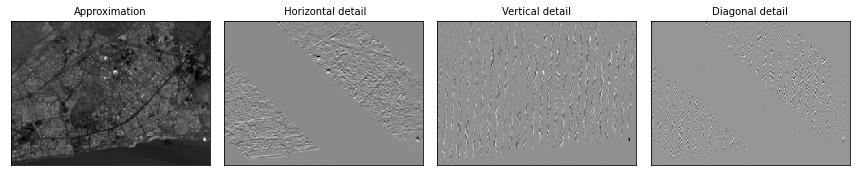

In [129]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs2 = pywt.dwt2(original, 'bior1.3')
LL, (LH, HL, HH) = coeffs2
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL, LH, HL, HH]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])



fig.tight_layout()
plt.show()

# print(LL)
# print('----------------')
# print(coeffs2[1][2])

[2]   Similarly apply DWT to PAN image and decompose it into
their respective approximation and detail coefficients.

In [130]:
ds1 = gdal.Open('L8_15_15.tif', gdal.GA_ReadOnly)
rb1 = ds1.GetRasterBand(1)
original1 = rb1.ReadAsArray()

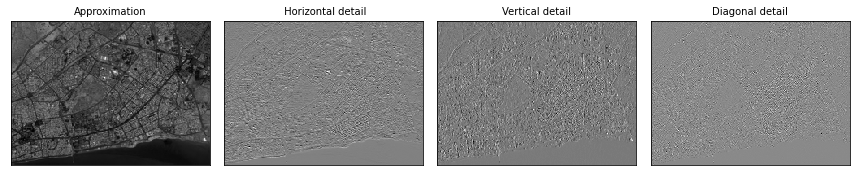

In [131]:
# Wavelet transform of image, and plot approximation and details
titles = ['Approximation', ' Horizontal detail',
          'Vertical detail', 'Diagonal detail']
coeffs21 = pywt.dwt2(original1, 'bior1.3')
LL1, (LH1, HL1, HH1) = coeffs21
fig = plt.figure(figsize=(12, 3))
for i, a in enumerate([LL1, LH1, HL1, HH1]):
    ax = fig.add_subplot(1, 4, i + 1)
    ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
    ax.set_title(titles[i], fontsize=10)
    ax.set_xticks([])
    ax.set_yticks([])



fig.tight_layout()

plt.show()

# print(LL1)
# print('----------------')
# print(coeffs21[1][2])

[3]   Approximation coefficient of PAN image is replaced with
that of MS image

In [132]:
pan_coe = list(coeffs21)
ms_coe = list(coeffs2)
ms_coe[0] = pan_coe[0]

[4]  **Each pair of the detail coefficients obtained in step (1) & (2)
are fused by using the proposed fusion rule based on spatial
frequency given in steps (5)–(9).**

[5]  PAN Detail Coefficients (PDC) is histogram matched with the
intensity component of the MS Detail Coefficients (MDC).

In [133]:
#MS = Refrence  PAN = Source
from skimage import exposure
from skimage.exposure import match_histograms

In [134]:
#Horizontal detail
image = pan_coe[1][0]
reference = ms_coe[1][0]

matched_pan_H = match_histograms(image, reference,multichannel=False,)

np.concatenate(matched_pan_H).astype(None)
# plt.imshow(matched_pan_H)
# plt.show()
# coeffs21[1][0] = list(matched_pan_H)
# print(len(matched_pan_H))
# print('-------------------------------')
# print(pan_coe[1][0][177])

len_num = len(matched_pan_H)
i = 0
while i < len_num:
  pan_coe[1][0][i] = matched_pan_H[i]
  i += 1

In [135]:
#Vertical detail
image = pan_coe[1][1]
reference = ms_coe[1][1]

matched_pan_V = match_histograms(image, reference)
np.concatenate(matched_pan_V).astype(None)

len_num = len(matched_pan_V)
i = 0
while i < len_num:
  pan_coe[1][1][i] = matched_pan_V[i]
  i += 1

In [136]:
#Diagonal detail
image = pan_coe[1][2]
reference = ms_coe[1][2]

matched_pan_D = match_histograms(image, reference)
np.concatenate(matched_pan_D).astype(None)

len_num = len(matched_pan_D)
i = 0
while i < len_num:
  pan_coe[1][2][i] = matched_pan_D[i]
  i += 1

In [137]:
# coeffsk = pywt.swt2([pan_coe[0],pan_coe[1][0],
#                     pan_coe[1][1],pan_coe[1][2]],
#                    'db1', level=2)
# pywt.iswt2(coeffsk, 'db1')

# backimage = pywt.idwt2(pan_coe, 'bior1.3')

# plt.imshow(backimage)
# plt.show()

[6]  Spatial Frequency of both, histogram matched PAN Detail
Coefficients (FSPC ) and the intensity value of MS Detail coef
ficients (FSMC ) are calculated using Eqs. (1)–(3).

[7]   Let FSMC be the Normalized spatial frequencies of the Inten
sity value of MS Detail Coefficients

[8]   Let FSPC be the Normalized spatial frequencies of histogram
matched PAN Detail Coefficients

In [138]:
#Horizontal
Fsmc = ms_coe[1][0]
Fspc = pan_coe[1][0]
NFsmc_H = Fsmc /(Fsmc + Fspc)
NFspc_H = Fspc / (Fsmc + Fspc)

In [139]:
#Vertical
Fsmc = ms_coe[1][1]
Fspc = pan_coe[1][1]
NFsmc_V = Fsmc /(Fsmc + Fspc)
NFspc_V = Fspc / (Fsmc + Fspc)

In [140]:
#Diagonal
Fsmc = ms_coe[1][2]
Fspc = pan_coe[1][2]
NFsmc_D = Fsmc /(Fsmc + Fspc)
NFspc_D = Fspc / (Fsmc + Fspc)

[9]   Then the fused Detail coefficients (Ifdc) will be equal to

In [145]:
Pdc = list(coeffs21)
Mdc = list(coeffs2)
#Horizontal
Ifdc_H = Mdc[1][0] * NFsmc_H + Pdc[1][0] * NFspc_H

#Vertical
Ifdc_V = Mdc[1][1] * NFsmc_V + Pdc[1][1] * NFspc_V

#Diagonal
Ifdc_D = Mdc[1][2] * NFsmc_D + Pdc[1][2] * NFspc_D


[10]   Apply Inverse DWT to fused detail coefficients (Ifdc) and
replaced MS Approximation Coefficient to get the fused
image (If).

In [142]:
#Horizontal
len_num1 = len(Ifdc_H)
i = 0
while i < len_num1:
  ms_coe[1][0][i] = Ifdc_H[i]
  i += 1

#Vertical
len_num2 = len(Ifdc_V)
i = 0
while i < len_num2:
  ms_coe[1][1][i] = Ifdc_V[i]
  i += 1

#Diagonal
len_num3 = len(Ifdc_D)
i = 0
while i < len_num3:
  ms_coe[1][2][i] = Ifdc_D[i]
  i += 1

In [1]:
#Invers DWT
fused_image = pywt.idwt2(ms_coe, 'bior1.3')

plt.imshow(fused_image)
plt.show()

NameError: ignored